Adapted from https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Retina mode
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from latexify import latexify, format_axes

In [3]:
latexify(columns=2)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_surface_and_contour(f, function_name):
    # Generate data
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # Create the single figure with two subplots
    fig = plt.figure()

    # Plot the 3D surface on the first subplot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='magma', edgecolor='none')  # Remove grid lines
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.grid(False)
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.view_init(elev=30, azim=30)
    # ax1.set_title('Surface Plot')

    # Plot the contour plot on the second subplot
    ax2 = fig.add_subplot(122, aspect='equal')  # Set 1:1 aspect ratio
    contour = ax2.contourf(X, Y, Z, levels=10, cmap='magma')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Plot, View from Top')

    # Add a colorbar to the contour plot
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [x, y, width, height]
    cbar = plt.colorbar(contour, cax=cbar_ax)
    plt.tight_layout()
  
    fig.savefig(f"../figures/mml/contour-{function_name}.pdf")




/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_50061/3839318635.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


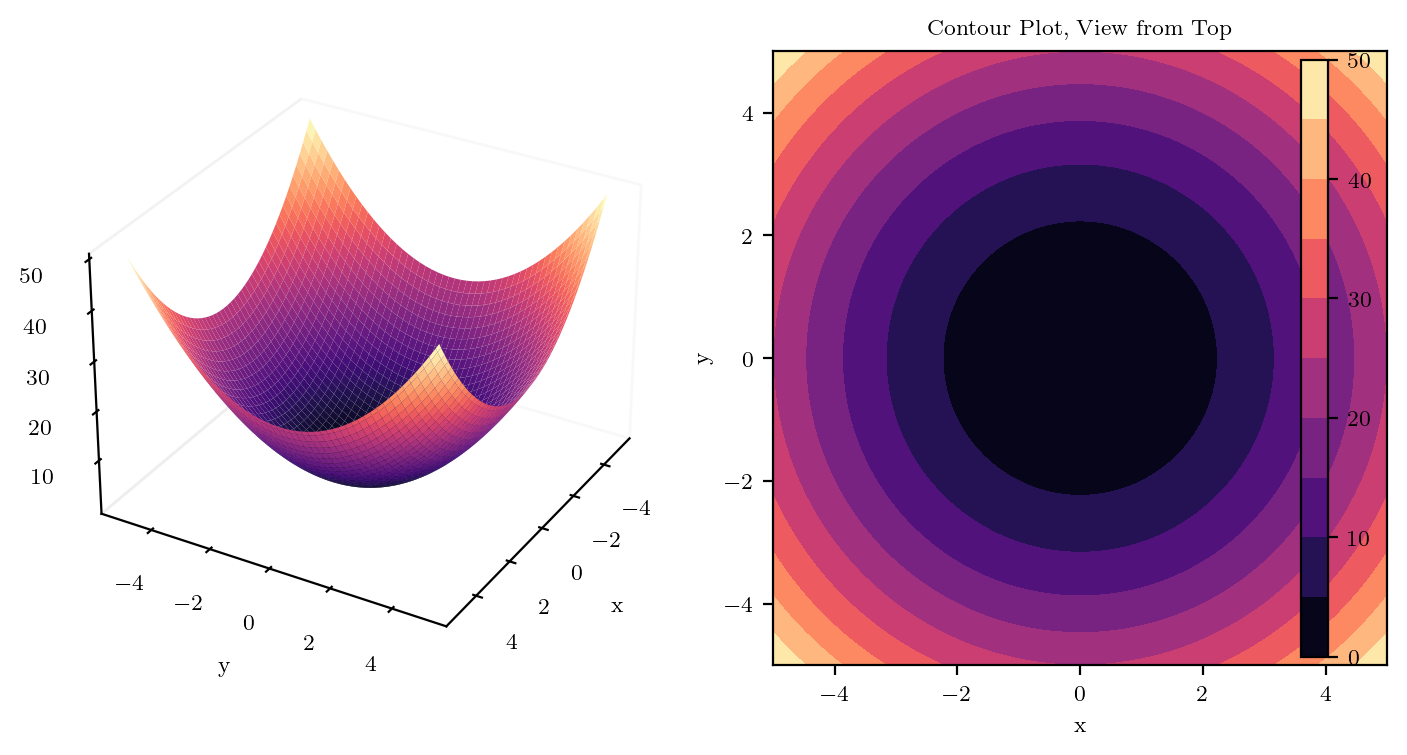

In [10]:
# Example usage with f(x, y) = x^2 + y^2
def example_function(x, y):
    return x**2 + y**2

plot_surface_and_contour(example_function, "x_squared_plus_y_squared")

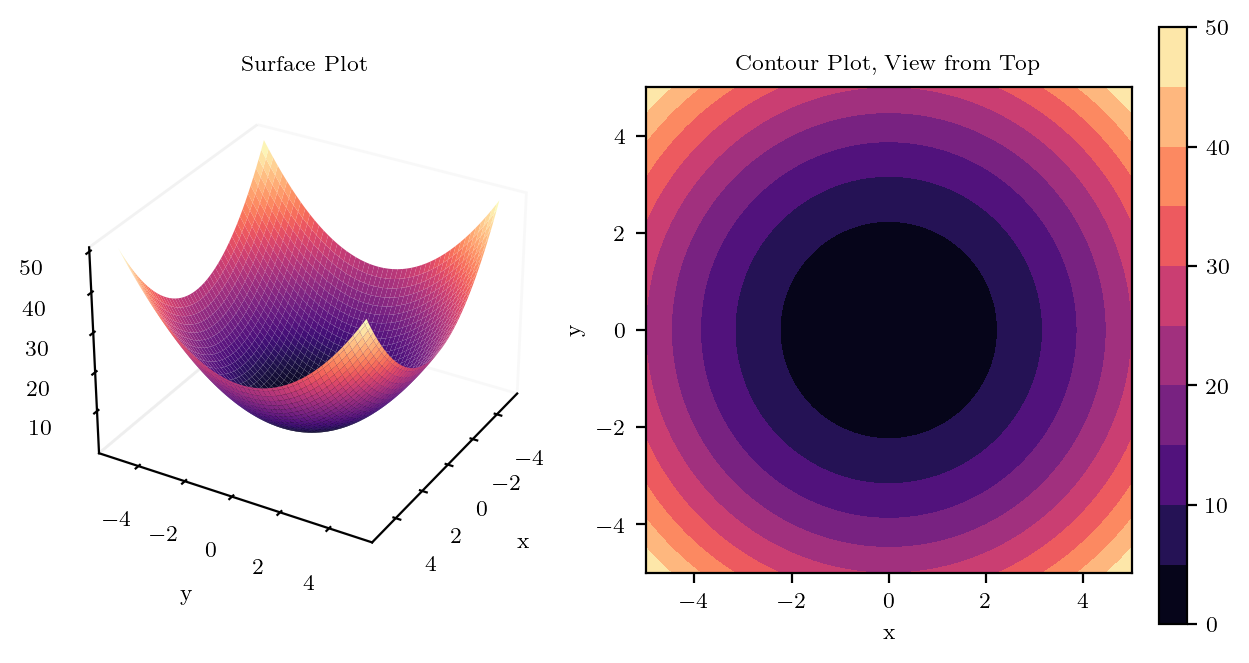

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_surface_and_contour(f, function_name):
    # Generate data
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # Create the single figure with two subplots
    fig = plt.figure()

    # Plot the 3D surface on the first subplot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='magma', edgecolor='none')  # Remove grid lines
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.grid(False)
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.view_init(elev=30, azim=30)
    ax1.set_title('Surface Plot')

    # Plot the contour plot on the second subplot
    ax2 = fig.add_subplot(122, aspect='equal')  # Set 1:1 aspect ratio
    contour = ax2.contourf(X, Y, Z, levels=10, cmap='magma')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Plot, View from Top')

    # Add a colorbar to the contour plot
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [x, y, width, height]
    cbar = plt.colorbar(contour, cax=cbar_ax)
    #fig.tight_layout()
  
    fig.savefig(f"../figures/mml/contour-{function_name}.pdf")

plot_surface_and_contour(lambda x, y: x**2 + y**2, "x_squared_plus_y_squared")
